# Exercise 11

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects, plot_model

## <span style="color:green"> Third degree polinomial fitting </span>

In this exercise we want to fit a cubic function using a neural network. \
I created a neural network composed of two layers with 32 neurons, the first layer  activation function is a tahn and the second one is a relu.

In [5]:
#target parameters
a=3
b=-2
c=-3
d=4

In [7]:
def f(x):
    return a*x**3 + b*x**2 + c*x + d

In [17]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train) , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid) , sigma)

In [18]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(1,),activation="tanh"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [19]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)

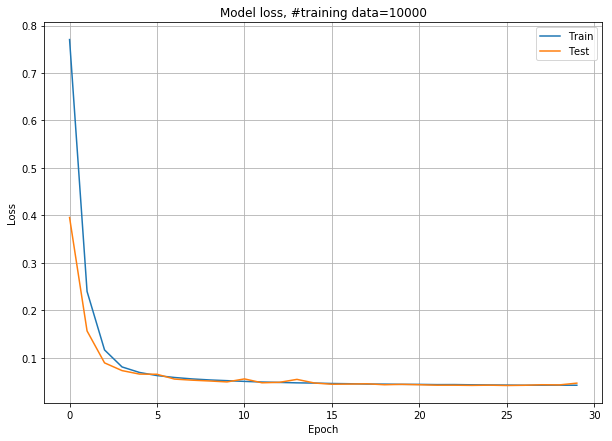

In [24]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model loss, #training data=10000')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='best')
ax.grid(True)

plt.show()

I trained my neural network for 30 epoches usign as optimizer sgd, but as shown in the graph the loss is nearly constant after 10. \
This low number of training epoches is due to the big size of the training data.

5/5 [==============================] - 0s 2ms/step


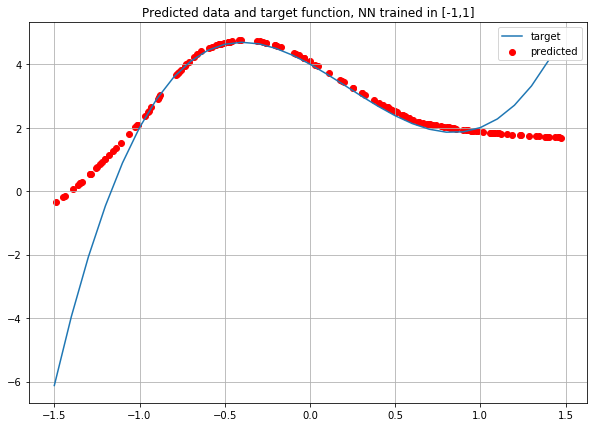

In [21]:
x_predicted = np.random.uniform(-1.5, 1.5, 150)
y_predicted = model.predict(x_predicted)
x_t = np.arange(-1.5,1.5,0.1)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

ax.scatter(x_predicted, y_predicted,color='r',label='predicted')
ax.plot(x_t, f(x_t),label='target')
ax.set_title("Predicted data and target function, NN trained in [-1,1]")
ax.legend()
ax.grid(True)
plt.show()

The data fit the function only in the range [-1,1] where the NN was trained. Out of that range the predicted data don't follow the target function: a neural network can't be used for prediction out of a determinated data set.

## <span style="color:green"> 2D function fitting </span>

In this exercise we want to fit a function f: $\mathbb{R} ^2 \to \mathbb{R} $ .\
As in the prevoius exercise I created a neural network composed of two layers with 32 neurons, the first layer  activation function is a tahn and the second one is a relu.

In [70]:
def f(x,y):
    return np.sin(x**2 + y**2)

In [71]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, 10000)
y_train = np.random.uniform(-3/2, 3/2, 10000)
x_valid = np.random.uniform(-3/2, 3/2, 1000)
y_valid = np.random.uniform(-3/2, 3/2, 1000)
x_valid.sort()
y_valid.sort()

sigma = 0.2 
z_train = np.random.normal(f(x_train, y_train) , sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(f(x_valid, y_valid) , sigma)

In [72]:
train_in = np.matrix([
    (x_train[i],y_train[i])
    for i in range(len(x_train))
])

valid_in = np.matrix([
    (x_valid[i],y_valid[i])
    for i in range(len(x_valid))
])

In [73]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(2,),activation="tanh"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [74]:
history = model.fit(x=train_in, y=z_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(valid_in, z_valid),
          verbose=0) 

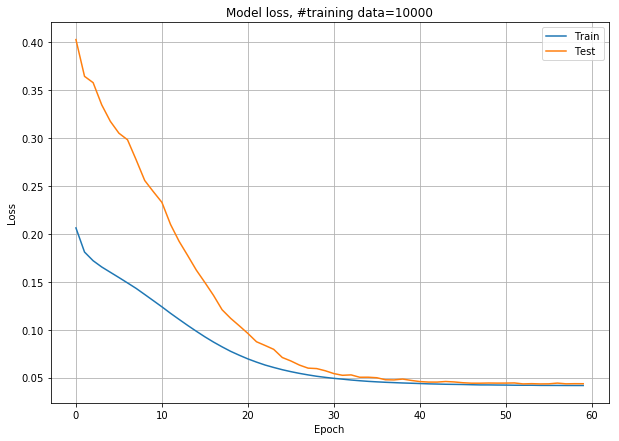

In [134]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model loss, #training data=10000')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='best')
ax.grid(True)

plt.show()

As in the previous case I used sgd as optimizer and I used the same amount of training data and epoches. <br>
In this case the loss decrease slower than the 1D one, as expected learn how to fit an higher dimension function is more difficult.                                                                                                              

32/32 [==============================] - 0s 1ms/step


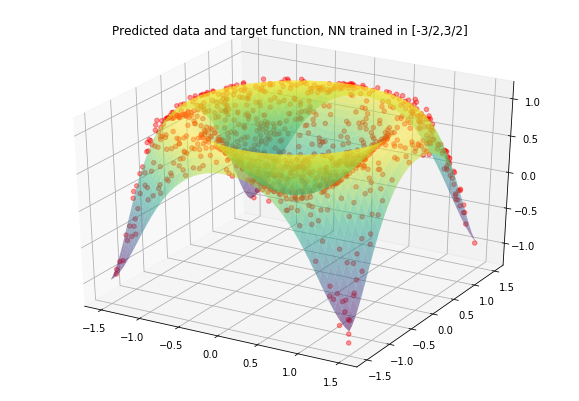

In [135]:
x = np.outer(np.linspace(-1.5, 1.5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x** 2 + y** 2)

x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)

predicted_in = np.matrix([
    (x_predicted[i], y_predicted[i])
    for i in range(len(x_predicted))
])

z_predicted = model.predict(predicted_in)

fig = plt.figure(figsize=(10,7))
 
# syntax for 3-D projection
ax = fig.add_subplot(111,projection='3d')

# plotting
ax.scatter3D(x_predicted, y_predicted, z_predicted, color='r', label='validation data',zorder=1, depthshade=True, alpha=.4)
ax.plot_surface(x, y, z, label='target', alpha=.5, zorder=-1, cmap="viridis")
ax.set_title("Predicted data and target function, NN trained in [-3/2,3/2]")

plt.grid(True)
plt.show()

The low loss and the the graph of the predicted data over the real function show how a neural network can be a universal fitter. The same NN (whit only the input shape modified) was able to fit a third degree polinomial and a 2D trigonometric function.